# Los patrones laborales: Análisis de Causalidad en el Rendimiento Diario y Rotación Laboral de los Trabajadores de Fábrica

#### Este proyecto se centra en investigar las relaciones causales entre el rendimiento diario y la attrición de los trabajadores en el contexto de una fábrica. El dataset utilizado contiene 18 meses de datos que incluyen observaciones diarias de eventos regulares (como asistencia de los trabajadores y nivel diario de eficacia) y eventos especiales (como accidentes, terminación de empleados o incorporación de nuevos empleados).



### Hipótesis principal:

La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como el día de la semana, el día del mes, la edad de los trabajadores, lo que permite predecir el rendimiento.

### Otras hipótesis:

1. Existe una relación positiva entre el rendimiento diario de un trabajador y su probabilidad de ser contratado por una empresa competidora.
2. Los lapsos mentales o accidentes físicos de un trabajador están asociados con un mayor riesgo de enfermedad y ausencia laboral.
3. La eficacia de los trabajadores varía según el día de la semana, el día del mes y el mes del año, con ciertos períodos mostrando un rendimiento superior.
4. La edad de los trabajadores influye en su eficacia diaria promedio, con los trabajadores más jóvenes y más experimentados mostrando diferencias significativas en su rendimiento.
5. La diferencia de edad entre un trabajador y su supervisor tiene un impacto en la eficacia diaria promedio del trabajador, siendo mayor la influencia cuando la brecha de edad es mayor.
6. Los trabajadores que colaboran principalmente con compañeros del mismo sexo muestran una eficacia diaria promedio diferente en comparación con aquellos que trabajan con compañeros del sexo opuesto.
7. El número de comportamientos de "trabajo en equipo" y "disrupción" exhibidos por los trabajadores está relacionado con el día del mes y los niveles de estrés causados por plazos de producción inminentes.
8. Los trabajadores pueden ser clasificados en grupos con diferentes niveles de eficacia diaria, y estos grupos pueden mostrar estabilidad o variabilidad en su rendimiento a lo largo del tiempo.

## Exploración de datos

In [2]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("dataset_eda.csv", encoding='latin1')

# Mostrar las primeras filas del DataFrame
df.head()

/var/folders/gn/fdryr4k17t95s1_9lf01ghfw0000gn/T/ipykernel_40010/1836966020.py:4: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_eda.csv", encoding='latin1')


,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.023,Efficacy,NaN,0.8,NaN,NaN
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN


In [ ]:
# Borrar columnas impares

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sub_ID                   411948 non-null  int64  
 1   sub_fname                411948 non-null  object 
 2   sub_lname                411948 non-null  object 
 3   sub_age                  411948 non-null  int64  
 4   sub_sex                  411948 non-null  object 
 5   sub_shift                411948 non-null  object 
 6   sub_team                 411948 non-null  object 
 7   sub_role                 411948 non-null  object 
 8   sub_coll_IDs             411136 non-null  object 
 9   sub_colls_same_sex_prtn  410957 non-null  float64
 10  sub_health_h             411948 non-null  float64
 11  sub_commitment_h         411948 non-null  float64
 12  sub_perceptiveness_h     411948 non-null  float64
 13  sub_dexterity_h          411948 non-null  float64
 14  sub_

In [3]:
df.describe()

,sub_ID,sub_age,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,...,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_week_in_series,event_day_in_series,event_weekday_num,actual_efficacy_h,recorded_efficacy
count,4.119480e+05,411948.000000,410957.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,...,411136.000000,411136.000000,411136.000000,411136.000000,411136.000000,411948.000000,411948.000000,411948.000000,191657.000000,191272.000000
mean,9.800036e+07,41.395637,0.502392,0.747096,0.751878,0.742695,0.741493,0.738500,0.738413,0.735608,...,39.876939,-1.525405,0.750638,0.730454,0.709282,39.509902,274.167562,2.000959,0.669063,0.668879
std,2.076600e+02,13.735554,0.127081,0.154026,0.147780,0.158803,0.149493,0.162415,0.146933,0.164769,...,14.081894,19.397769,0.139544,0.175733,0.161476,22.513467,157.607908,1.415252,0.396246,0.413077
min,9.800000e+07,18.000000,0.000000,0.153000,0.172000,0.169000,0.240000,0.152000,0.290000,0.215000,...,18.000000,-45.000000,0.437000,0.384000,0.346000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,9.800019e+07,29.000000,0.421053,0.655000,0.653000,0.644000,0.646000,0.639000,0.635000,0.623000,...,28.000000,-17.000000,0.629000,0.659000,0.572000,20.000000,138.000000,1.000000,0.410000,0.400000
50%,9.800036e+07,41.000000,0.473684,0.765000,0.764000,0.763000,0.761000,0.755000,0.754000,0.760000,...,38.000000,0.000000,0.747000,0.745000,0.686000,40.000000,274.000000,2.000000,0.615000,0.600000
75%,9.800053e+07,53.000000,0.578947,0.859000,0.867000,0.868000,0.859000,0.864000,0.851000,0.870000,...,53.000000,13.000000,0.868000,0.909000,0.840000,59.000000,411.000000,3.000000,0.874000,0.900000
max,9.800079e+07,65.000000,0.789474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999000,...,62.000000,43.000000,1.000000,0.999000,0.985000,78.000000,546.000000,5.000000,3.763000,4.100000


In [4]:
df.shape

(411948, 42)

## Exploración de la calidad de datos

In [ ]:
# Columnas:

# columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']


In [6]:
columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']

valores_faltantes = df[columns].isnull().sum() #Exploración de los datos que faltan en el csv

print(valores_faltantes)



sub_ID                          0
sub_fname                       0
sub_lname                       0
sub_age                         0
sub_sex                         0
sub_shift                       0
sub_team                        0
sub_role                        0
sub_coll_IDs                  812
sub_colls_same_sex_prtn       991
sub_health_h                    0
sub_commitment_h                0
sub_perceptiveness_h            0
sub_dexterity_h                 0
sub_sociality_h                 0
sub_goodness_h                  0
sub_strength_h                  0
sub_openmindedness_h            0
sub_workstyle_h                 0
sup_ID                        812
sup_fname                     812
sup_lname                     812
sup_age                       812
sup_sub_age_diff              812
sup_sex                       812
sup_role                      812
sup_commitment_h              812
sup_perceptiveness_h          812
sup_goodness_h                812
event_date    

In [7]:
# Obtener la distribución de valores en una columna categórica

columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']

value_counts = df[columns].value_counts()
print(value_counts)


Series([], Name: count, dtype: int64)


In [8]:
# Rellenar valores faltantes con la media de la columna:

columns = ['sub_colls_same_sex_prtn']
for column in columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [9]:
columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']

valores_faltantes = df[columns].isnull().sum()

print(valores_faltantes)

sub_ID                          0
sub_fname                       0
sub_lname                       0
sub_age                         0
sub_sex                         0
sub_shift                       0
sub_team                        0
sub_role                        0
sub_coll_IDs                  812
sub_colls_same_sex_prtn         0
sub_health_h                    0
sub_commitment_h                0
sub_perceptiveness_h            0
sub_dexterity_h                 0
sub_sociality_h                 0
sub_goodness_h                  0
sub_strength_h                  0
sub_openmindedness_h            0
sub_workstyle_h                 0
sup_ID                        812
sup_fname                     812
sup_lname                     812
sup_age                       812
sup_sub_age_diff              812
sup_sex                       812
sup_role                      812
sup_commitment_h              812
sup_perceptiveness_h          812
sup_goodness_h                812
event_date    

In [11]:
import pandas as pd

columnas_innecesarias = ['behav_cause_h',  'record_cause', 'recorded_note_from_sup', 'record_conf_matrix_h']  # lista de columnas que no son de interés

df = df.drop(columnas_innecesarias, axis=1)


In [12]:
df.shape

(411948, 38)

## Visualizaciones

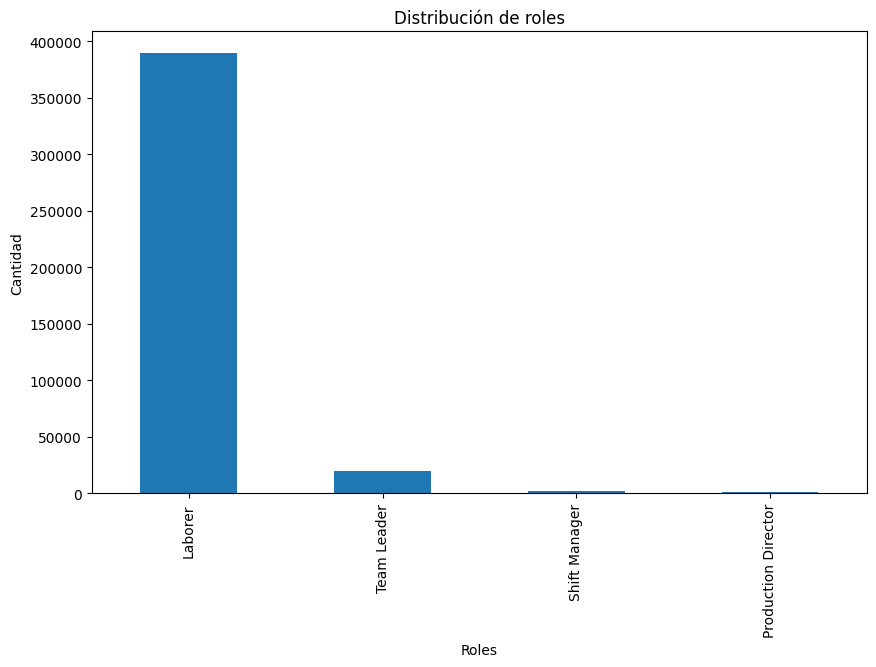

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño de la figura
df['sub_role'].value_counts().plot(kind='bar')  # Diagrama de barras de la columna 'sub_role'
plt.title('Distribución de roles')  # Título del gráfico
plt.xlabel('Roles')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico


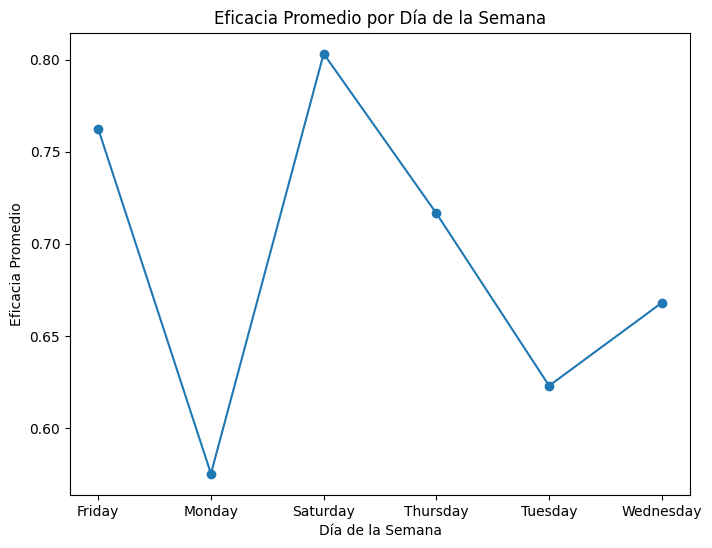

In [16]:
import matplotlib.pyplot as plt

# Agrupar por día de la semana y calcular la eficacia promedio
efficiency_by_weekday = df.groupby('event_weekday_name')['actual_efficacy_h'].mean()

plt.figure(figsize=(8, 6))
efficiency_by_weekday.plot(marker='o')
plt.title('Eficacia Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Eficacia Promedio')
plt.xticks(range(len(efficiency_by_weekday)), efficiency_by_weekday.index)
plt.show()


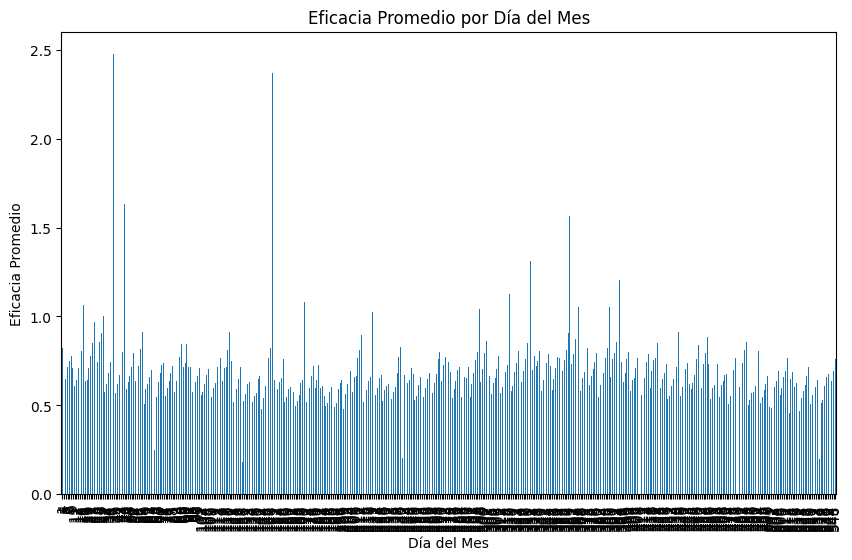

In [17]:
import matplotlib.pyplot as plt

# Agrupar por día del mes y calcular la eficacia promedio
efficiency_by_day = df.groupby('event_day_in_series')['actual_efficacy_h'].mean()

plt.figure(figsize=(10, 6))
efficiency_by_day.plot(kind='bar')
plt.title('Eficacia Promedio por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Eficacia Promedio')
plt.show()


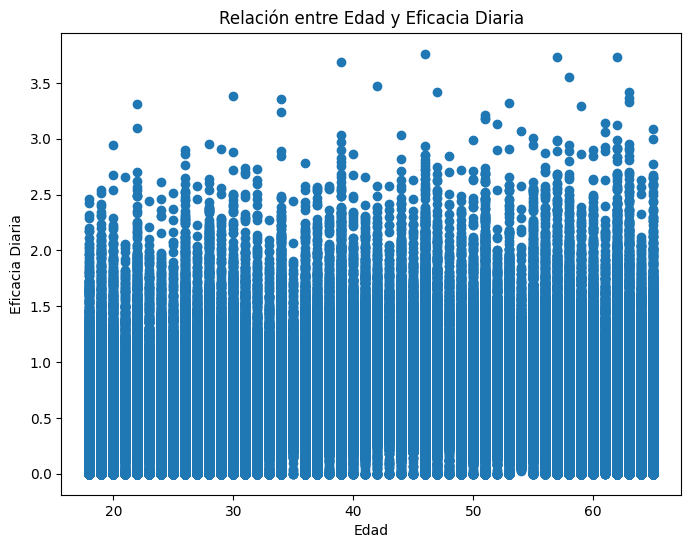

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['sub_age'], df['actual_efficacy_h'])
plt.title('Relación entre Edad y Eficacia Diaria')
plt.xlabel('Edad')
plt.ylabel('Eficacia Diaria')
plt.show()


In [4]:
# Estadísticas descriptivas de las características numéricas
numeric_columns = ['sub_age', 'actual_efficacy_h']  # Lista de las características numéricas

numeric_stats = df[numeric_columns].describe()
print(numeric_stats)

# Obtener la media de las características categóricas
categorical_columns = ['sub_sex', 'sub_shift']  # Lista de las características categóricas

categorical_means = df[categorical_columns].mode().iloc[0]
print(categorical_means)


             sub_age  actual_efficacy_h
count  411948.000000      191657.000000
mean       41.395637           0.669063
std        13.735554           0.396246
min        18.000000           0.000000
25%        29.000000           0.410000
50%        41.000000           0.615000
75%        53.000000           0.874000
max        65.000000           3.763000
sub_sex            F
sub_shift    Shift 3
Name: 0, dtype: object


#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como el día de la semana


$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [9]:
eficacia_por_dia = df.groupby('event_weekday_name')['actual_efficacy_h'].mean()
print(eficacia_por_dia)


event_weekday_name
Friday       0.762517
Monday       0.575163
Saturday     0.803288
Thursday     0.716595
Tuesday      0.622929
Wednesday    0.668053
Name: actual_efficacy_h, dtype: float64


In [11]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar los datos relevantes
df_filtered = df[['event_weekday_name', 'actual_efficacy_h']].dropna()

# Realizar el análisis de varianza
f_statistic, p_value = f_oneway(*[group['actual_efficacy_h'] for name, group in df_filtered.groupby('event_weekday_name')])

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

# Realizar pruebas de comparaciones múltiples (por ejemplo, prueba de Tukey)
tukey_results = pairwise_tukeyhsd(df_filtered['actual_efficacy_h'], df_filtered['event_weekday_name'])
print(tukey_results)


Estadístico F: 1103.294049428836
Valor p: 0.0
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
  Friday    Monday  -0.1874    0.0 -0.1954 -0.1793   True
  Friday  Saturday   0.0408 0.9674 -0.1043  0.1858  False
  Friday  Thursday  -0.0459    0.0  -0.054 -0.0379   True
  Friday   Tuesday  -0.1396    0.0 -0.1476 -0.1315   True
  Friday Wednesday  -0.0945    0.0 -0.1025 -0.0864   True
  Monday  Saturday   0.2281 0.0001  0.0831  0.3732   True
  Monday  Thursday   0.1414    0.0  0.1334  0.1495   True
  Monday   Tuesday   0.0478    0.0  0.0397  0.0558   True
  Monday Wednesday   0.0929    0.0  0.0848  0.1009   True
Saturday  Thursday  -0.0867 0.5296 -0.2317  0.0584  False
Saturday   Tuesday  -0.1804 0.0053 -0.3254 -0.0353   True
Saturday Wednesday  -0.1352 0.0841 -0.2803  0.0098  False
Thursday   Tuesday  -0.0937    0.0 -0.1017 -0.0856   True
Thursday Wednesday  -0.048

#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por el mes.

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [20]:
# Columna "event_date" A formato de fecha en DataFrame
df['event_date'] = pd.to_datetime(df['event_date'])

In [21]:
monthly_efficacy = df.groupby(df['event_date'].dt.month)['actual_efficacy_h'].mean()


In [25]:
monthly_efficacy

event_date
1     0.737374
2     0.697193
3     0.680368
4     0.666269
5     0.618168
6     0.602380
7     0.609496
8     0.629876
9     0.664551
10    0.689002
11    0.697783
12    0.754446
Name: actual_efficacy_h, dtype: float64

In [27]:
import pandas as pd

# Convertir la columna "event_date" al formato de fecha
df['event_date'] = pd.to_datetime(df['event_date'])

# Crear la columna "mes" que contiene el mes de la fecha
df['mes'] = df['event_date'].dt.month




In [3]:
df['event_date']

0          1/1/2021
1          1/1/2021
2          1/1/2021
3          1/1/2021
4          1/1/2021
            ...    
411943    6/30/2022
411944    6/30/2022
411945    6/30/2022
411946    6/30/2022
411947    6/30/2022
Name: event_date, Length: 411948, dtype: object

In [28]:
# Filtrar los datos relevantes
df_filtered = df[['mes', 'actual_efficacy_h']].dropna()

# Realizar el análisis de varianza
f_statistic, p_value = f_oneway(*[group['actual_efficacy_h'] for name, group in df_filtered.groupby('mes')])

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

Estadístico F: 244.47138456593294
Valor p: 0.0


In [29]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar los datos relevantes
df_filtered = df[['mes', 'actual_efficacy_h']].dropna()

# Crear una lista de arrays con los valores de eficacia para cada mes
months = df_filtered['mes'].unique()
efficacy_by_month = [df_filtered[df_filtered['mes'] == month]['actual_efficacy_h'] for month in months]

# Realizar el análisis de varianza
f_statistic, p_value = f_oneway(*efficacy_by_month)

# Realizar pruebas de comparaciones múltiples (Tukey)
tukey_results = pairwise_tukeyhsd(np.concatenate(efficacy_by_month), np.concatenate([[month]*len(arr) for month, arr in zip(months, efficacy_by_month)]))

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

print(tukey_results)


Estadístico F: 244.47138456593294
Valor p: 0.0
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0402    0.0  -0.053 -0.0274   True
     1      3   -0.057    0.0 -0.0694 -0.0446   True
     1      4  -0.0711    0.0 -0.0837 -0.0585   True
     1      5  -0.1192    0.0 -0.1318 -0.1066   True
     1      6   -0.135    0.0 -0.1475 -0.1225   True
     1      7  -0.1279    0.0 -0.1431 -0.1126   True
     1      8  -0.1075    0.0 -0.1228 -0.0922   True
     1      9  -0.0728    0.0 -0.0881 -0.0576   True
     1     10  -0.0484    0.0 -0.0639 -0.0328   True
     1     11  -0.0396    0.0 -0.0549 -0.0243   True
     1     12   0.0171 0.0114   0.002  0.0321   True
     2      3  -0.0168 0.0007 -0.0294 -0.0043   True
     2      4  -0.0309    0.0 -0.0437 -0.0182   True
     2      5   -0.079    0.0 -0.0918 -0.0663   True
     2      6  -0.0948    0.0 -0.1075 -0.0821   True

#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como la quincena del mes.

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [15]:
event_day_in_series_column = df['event_week_in_series']

print(event_day_in_series_column)

0          1
1          1
2          1
3          1
4          1
          ..
411943    78
411944    78
411945    78
411946    78
411947    78
Name: event_week_in_series, Length: 411948, dtype: int64


#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como la edad de los trabajadores.


$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [30]:
from scipy.stats import f_oneway

df_filtered = df[['sub_age', 'actual_efficacy_h']].dropna()

# Dividir los datos en grupos por edad
age_groups = [df_filtered[df_filtered['sub_age'] <= 30]['actual_efficacy_h'],
              df_filtered[(df_filtered['sub_age'] > 30) & (df_filtered['sub_age'] <= 40)]['actual_efficacy_h'],
              df_filtered[(df_filtered['sub_age'] > 40) & (df_filtered['sub_age'] <= 50)]['actual_efficacy_h'],
              df_filtered[df_filtered['sub_age'] > 50]['actual_efficacy_h']]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*age_groups)

print("Estadístico F:", f_statistic)
print("Valor p:", p_value)


Estadístico F: 1538.465041662819
Valor p: 0.0


In [31]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar pruebas de comparaciones múltiples (Tukey)
tukey_results = pairwise_tukeyhsd(np.concatenate(age_groups), np.concatenate([[i+1]*len(age_groups[i]) for i in range(len(age_groups))]))

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

print(tukey_results)


Estadístico F: 1538.465041662819
Valor p: 0.0
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     1      2   0.0821   0.0 0.0755  0.0888   True
     1      3   0.1628   0.0  0.156  0.1695   True
     1      4   0.1254   0.0 0.1194  0.1314   True
     2      3   0.0806   0.0 0.0735  0.0877   True
     2      4   0.0433   0.0 0.0368  0.0497   True
     3      4  -0.0374   0.0 -0.044 -0.0308   True
--------------------------------------------------
